In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt
import numpy as np

In [2]:
df = pd.read_parquet('escooter_history.parquet', engine='pyarrow')

In [3]:
df.windspeed = pd.cut(df.windspeed,6,labels=["Calm","Gentle breeze","Moderate breeze","Fresh breeze","Strong breeze", "High wind"])
df.humidity = pd.cut(df.humidity,[0,20,60,100],labels=["Uncomfortably dry","Comfort range","Uncomfortably wet"])

In [4]:
df['rc_true'] = df['registered_customer']
df["rc_true"] = df["rc_true"].astype(int)
df["rc_false"] = 1 - df["rc_true"]

df_agg = df.groupby([df.datetime.dt.to_period('H')]).agg({
    'holiday':'max',
    'workingday':'max',
    'weather' : 'max',
    'temp' : 'max',
    'atemp' : 'max',
    'humidity': 'max',
    'windspeed' : 'max',
    'registered_customer': 'count',
            })
df_agg.columns = df_agg.columns.str.replace('registered_customer', 'all_customers')

In [5]:
# df_agg['hour'] = df_agg['datetime'].dt.hour
# df_agg = df_agg.drop(df_agg[df_agg.hour < 6].index)
# df_agg = df_agg.drop(columns=['hour'])

<AxesSubplot:xlabel='windspeed', ylabel='all_customers'>

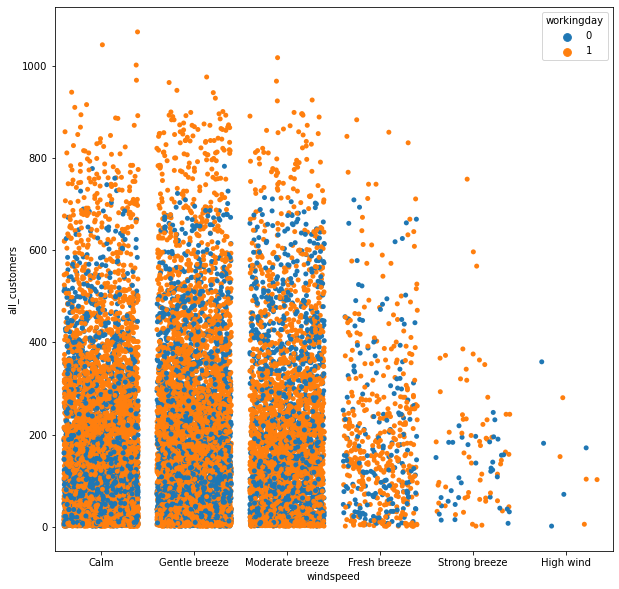

In [6]:
fig = plt.figure(figsize=(10,10))
sns.stripplot(x="windspeed", y="all_customers", hue="workingday", data=df_agg,jitter=0.4,size=5)

<AxesSubplot:xlabel='humidity', ylabel='all_customers'>

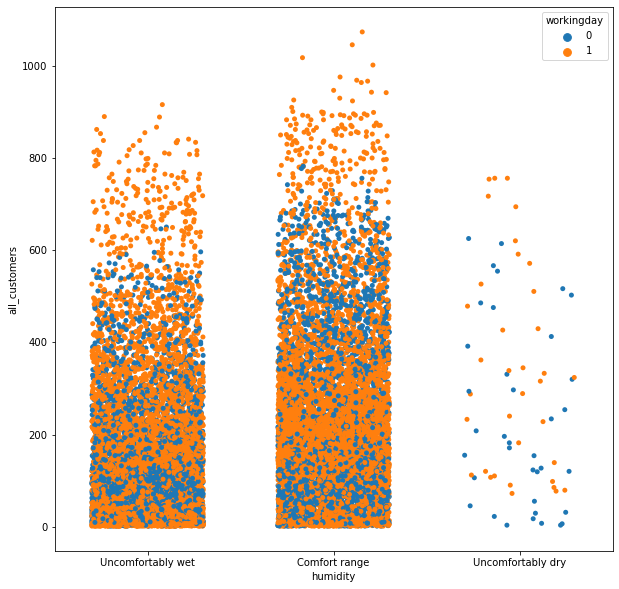

In [8]:
fig = plt.figure(figsize=(10,10))
sns.stripplot(x="humidity", y="all_customers", hue="workingday", data=df_agg,jitter=0.3,size=5)

<AxesSubplot:xlabel='windspeed', ylabel='all_customers'>

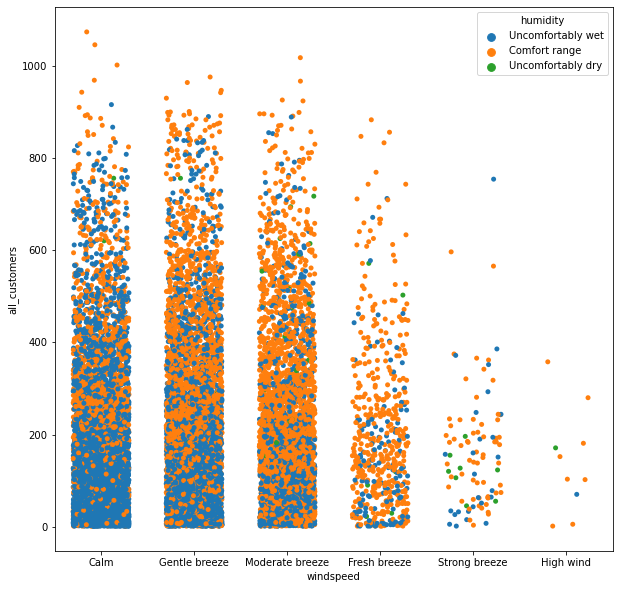

In [12]:
fig = plt.figure(figsize=(10,10))
sns.stripplot(x="windspeed", y="all_customers", hue="humidity", data=df_agg,jitter=0.3,size=5)